In [ ]:
!git clone https://github.com/vincentnam/ProjetInterpromo2020G8.git

Clonage dans 'ProjetInterpromo2020G8'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.


In [35]:
"""
Created on Fri Jan 3 13:28:13 CET 2019
Group 8
@authors: DANG Vincent-Nam
"""

from abc import ABCMeta, abstractmethod
from typing import Iterable

import numpy as np
import pipeline 


import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from collections import defaultdict
from PIL import Image
# TODO :
#  - Tests unitaires et tests intégrations : test pipeline
#  (run_pipeline), levées d'erreur, etc...
#  - Traduire les commentaires en anglais (si besoin ?)
#  - Mettre à jour le pipeline pour prendre en compte des resultats
#    auxiliaires nécessaire pour le traitement suivant
#  - Gestion des hints plus formellement
#  - Gestion de l'héritage des docstrings



In [36]:
class ImageUtil():
    def __init__(self, input_path, image_name, image=None):
        self.input_path = input_path
        self.image_name = image_name
        if image is  None:
            self.image_pil = Image.open(self.input_path + self.image_name)
            self.image_plt = plt.imread(self.input_path + self.image_name)
        else:
            self.image_pil = image
            self.image_plt = image
            self.image = image
        
        self.sort_pixel = {}
        
    def sort_pixel(self):
        """
            Sort the pixel value by number of occurences that they appear in the image
        """
        by_color = defaultdict(int)
        for pixel in self.image_pil.getdata():
            by_color[pixel] += 1

        self.sort_pixel =  {k: v for k, v in sorted(by_color.items(), key=lambda item: item[1], reverse=True)}

    def visualisation(self, x_size, y_size):
        """
            Show the image
            params : 
                x_size - width of the plot
                y_size - height of the plot
        """
        plt.figure(figsize=(x_size,y_size))
        if self.image is not None:
            plt.imshow(self.image.astype('uint8'))
        else:
            plt.imshow(self.image_plt.astype('uint8'))

    def to_rgb(self):
        """
            Convert the image to an RGB format from a BGR format
        """
        return cv.cvtColor(self.image_plt, cv.COLOR_BGR2RGB)
    
    def to_gray(self):
        """
            Convert the image to a GRAY format from a BGR format
        """
        return cv.cvtColor(self.image_plt, cv.COLOR_BGR2GRAY)

    def save_image(self, output_path):
        """
            Save the image to specific location
            params : 
                output_path - where the image will be saved
        """
        plt.imsave(output_path + self.image_name, self.image_plt.astype('uint8'))

class Colour():
    COLOURS = {
        'LAYOUT_SEATGURU': {
            'jpg':{
                "blue":[139, 168, 198],
                "yellow": [247, 237, 86],
                "exit": [222, 111, 100],
                "green": [89, 185, 71],
                "red_bad_seat": [244, 121, 123],
                "blue_seat_crew": [140,169,202],
                "baby": [184,214,240]
            },
            'png':{
                "blue":[41,182,209],
                "yellow": [251,200,2],
                "exit": [190,190,190],
                "green": [41,209,135],
                "red_bad_seat": [226,96,82],
                "blue_seat_crew": [41,182,209],
                "baby": [197,197,197]
            }temp_bar.jpg
        },
        'LAYOUT_SEATMAESTRO': {
            'png': {
                "blue":[81,101,181],
                "exit": [1,120,175],
                "green": [120,189,198],
                "red_bad_seat": [207,90,150],
                "blue_seat_crew": [138,165,190] 
            }
        }
    }
    
    def __init__(self, input_path, layout, image_name):
        self.input_path = input_path
        self.layout = layout
        self.image_name = image_name
        self.image_extension = image_name.split('.')[-1]
        
        self.image = plt.imread(self.input_path + self.layout + '/' + self.image_name)
        self.image_util = ImageUtil(self.input_path + self.layout + '/', self.image_name)
        
    def colour_detection(self, colours, epsilon, rgb_len, colour_mode, default_colour):
        """
            This function will detect the colour and will do some pre-process on it
            params : 
                colours : a dictionnary with a ltemp_bar.jpgist of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    if true : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour by the one in the dict. 
                    if false : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour by the default color value.
                default_color : default color value that a pixel has to take
        """
        # make a copy to avoid to erase the original image
        img_copy = self.image_util.to_rgb()

        # for each line we get the pixel value
        for i, line in enumerate(self.image):
            for j, pixel in enumerate(line):
                # Get only 3 first value corresponding to R,G,B
                pixel = [int(val) if val >  1.0 else int(val*255) for val in self.image[i][j]][:rgb_len]

                # if we want to show a specific colour
                if colour_mode:
                    # default value
                    img_copy[i][j] = default_colour

                    # for each colour we change the pixel value if we find the same colour
                    for colour in colours.values():
                        if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, colour)]) == rgb_len:
                            img_copy[i][j] = coltemp_bar.jpgour

                # if we want to hide a colour by a default value
                else:
                    # default value
                    img_copy[i][j] = pixel

                    # for each recognized colour, we change it by the default value
                    for colour in colours.values():
                            if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, colour)]) == rgb_len:
                                img_copy[i][j] = default_colour
        return img_copy


    def colour_pipeline(self, colours = {}, epsilon = 20, colour_mode = True, 
                    default_colour = [0, 0, 0], rgb_len = 3):
        """
            Call colour_detection function in order to pre-process colours in image
            params : 
                colours : a dictionnary with a list of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    - if true (highlight colours in "colours" dict by standardize it) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the one in the dict. 
                    - if false (remove colours in "colours" dict by the default one) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the default color value.
                default_color : default color value that a pixel has to take
        """
        # if colours is empty we take the default value
        if not bool(colours): colours = COLOURS[self.layout][self.image_extension]
            
        # get the image result from colour decection pre-process wanted
        image_res = self.colour_detection(colours, epsilon, rgb_len, colour_mode, default_colour)

        return image_res

SyntaxError: invalid syntax (<ipython-input-36-f6ab7ac6e69f>, line 78)

In [37]:
# SIEGE 


# def coord_pattern_finder(image, template, threshold):
#     """
#     input:
#         image : image plane cv2.imread() black and white
#         template : image pattern cv2.imread()
#         threshold : threshold for this pattern
#     output:
#         position : list right angle position for this pattern on the image

#     """
#     position = []  # Variable output
#     # List of match
#     res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
#     for pos in zip(*np.where(res >= threshold)[::-1]):
#         position.append(pos)
#     return(position)



In [38]:
    
class NormalSeatNoCL(pipeline.Process):
    process_desc = "OpenCV4.1.2.30 -> pattern matching " \
                   "for seat without colors or letters"
    
    @pipeline.overrides
    def run(self, image: Iterable, json, threshold) -> None:
        position = []  # Variable output
        # List of match
        res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
        for pos in zip(*np.where(res >= threshold)[::-1]):
            position.append(pos)
        json["normal_seat"]= position




In [39]:
from IPython.display import SVG
import matplotlib.pyplot as plt
SVG(url='https://cdn.seatguru.com/en_US/img/20200108203441/seatguru/airlines_new/Aer_Lingus/Aer_Lingus_Airbus_A330-200.svg')


<IPython.core.display.SVG object>

In [40]:
class BlackWhite(pipeline.Preprocess):
    process_desc = "OpenCV4.1.2.30 -> rgb to grey"
    
    def run(self, image: Iterable) -> None:
        pass

SyntaxError: unexpected EOF while parsing (<ipython-input-40-cf2f5da224f8>, line 5)

In [41]:
def Coucoutest(image):
    ImageUtil(image).to_gray()
    #cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    

In [47]:

test_img = cv.imread("/data/git-clone/ProjetInterpromo2020G8/Oman_Air_Boeing_737-700_new_plane686.jpg")
plt.figure(figsize=(20,40))
print(img)

None


<Figure size 1440x2880 with 0 Axes>

In [44]:
!ls


Celya_Marcelo_notebook.ipynb		  __pycache__
Charlotte_Marque_notebook.ipynb		  README.md
Chloe_Gaussail_notebook.ipynb		  requirements.txt
Hadda_Hassan_notebook.ipynb		  SEATGURU_COMPLETE_INFO.csv
Image_lignes.csv			  Sofiane_Benhamouche_notebook.ipynb
images					  Sonia_Bezombes_notebook.ipynb
Jason_Daurat_notebook.ipynb		  Theo_Vedis_notebook.ipynb
LAYOUT_SEATGURU				  tuto_git_base.pdf
Notebook_Rendu.ipynb			  Vincent-Nam_Dang_notebook.ipynb
Oman_Air_Boeing_737-700_new_plane686.jpg  William_Azzouza_notebook.ipynb
pipeline.py


In [23]:
Coucoutest(img)

TypeError: __init__() missing 1 required positional argument: 'image_name'

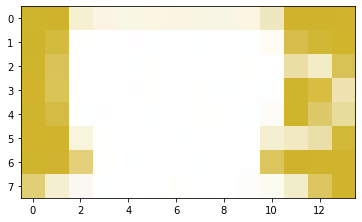

In [24]:
plt.imshow(img)